In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl

In [2]:
from PRPlot import PRPlot
from MetrPlot import MetrPlot

In [3]:
warnings.simplefilter('ignore')

In [4]:
from npls import npls

## Take data

In [5]:
d=np.load('2021-11-17.npz')

In [6]:
d.files

['X', 'Y', 'Em', 'Ex', 'B0', 'C0']

In [8]:
def flatten(x):
    sh = x.shape
    return x.reshape(sh[0:len(sh)-1])

Centering and cross-validation

Synthetic

In [106]:
X=d['X']
X*=1e7
trtrt=X.mean(axis = 0)
y=d['Y'][:,0]
X -= X.mean(axis = 0)
y*=1e1

In [107]:
(max(y)-min(y))/1e1

0.9892792939426727

In [108]:
aaa=y.mean()

In [109]:
y -= y.mean()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1428, random_state=42)

Fitting

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
import sklearn

In [69]:
npls1=npls()
scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
parametrsNames={'n_components': [5],
                #
                'a': np.logspace(-3, 8,num = 24)}

In [111]:
npls1=npls()
scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
parametrsNames={'n_components': range(1,16),
                #
                'a': [0.003]}

In [112]:


%%time
gridCought=GridSearchCV(npls1, parametrsNames, cv=5, scoring=scoring,refit='r2', return_train_score=True)
gridCought.fit(X_train.copy(),y_train.copy())

#gridCought.fit(X, y)
r2_p=gridCought.score(X_test.copy(), y_test.copy())
mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
mse_c=gridCought.cv_results_[ "mean_train_mse" ]
r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
r2_c=gridCought.cv_results_[ "mean_train_r2" ]
#predictors=gridCought.predict(X_test.copy())



CPU times: user 18.5 s, sys: 2.85 s, total: 21.3 s
Wall time: 1min 31s


In [74]:
gridCought.best_estimator_

npls(a=0.003007882518043099, n_components=5)

In [117]:
predictors=gridCought.predict(X)

In [118]:
predictors+=aaa
y+=aaa

In [119]:
y/=1e1
predictors/=1e1

In [113]:
max(y+aaa)-min(y+aaa)

9.892792939426727

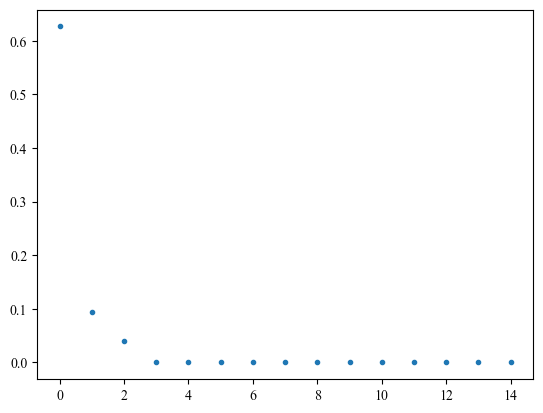

In [77]:
plt.plot(np.sqrt(mse_cv),".")
# plt.ylim((min(r2_cv),max(r2_cv)))
plt.show()

In [28]:
(mse_cv**0.5)/9.892792939426727

array([2.89847540e-08, 8.93008425e-09, 1.59541467e-09, 5.19679952e-10,
       1.40312533e-10, 6.59614522e-11, 4.20956021e-12, 2.21960255e-12,
       6.71064210e-13, 1.40638391e-13, 3.20242148e-14, 1.05133103e-14,
       4.01011936e-15, 5.08711831e-16, 1.58617219e-16, 7.39394568e-17,
       6.57756423e-17, 7.33076271e-17, 7.51704840e-17, 7.33225121e-17,
       6.79387461e-17])

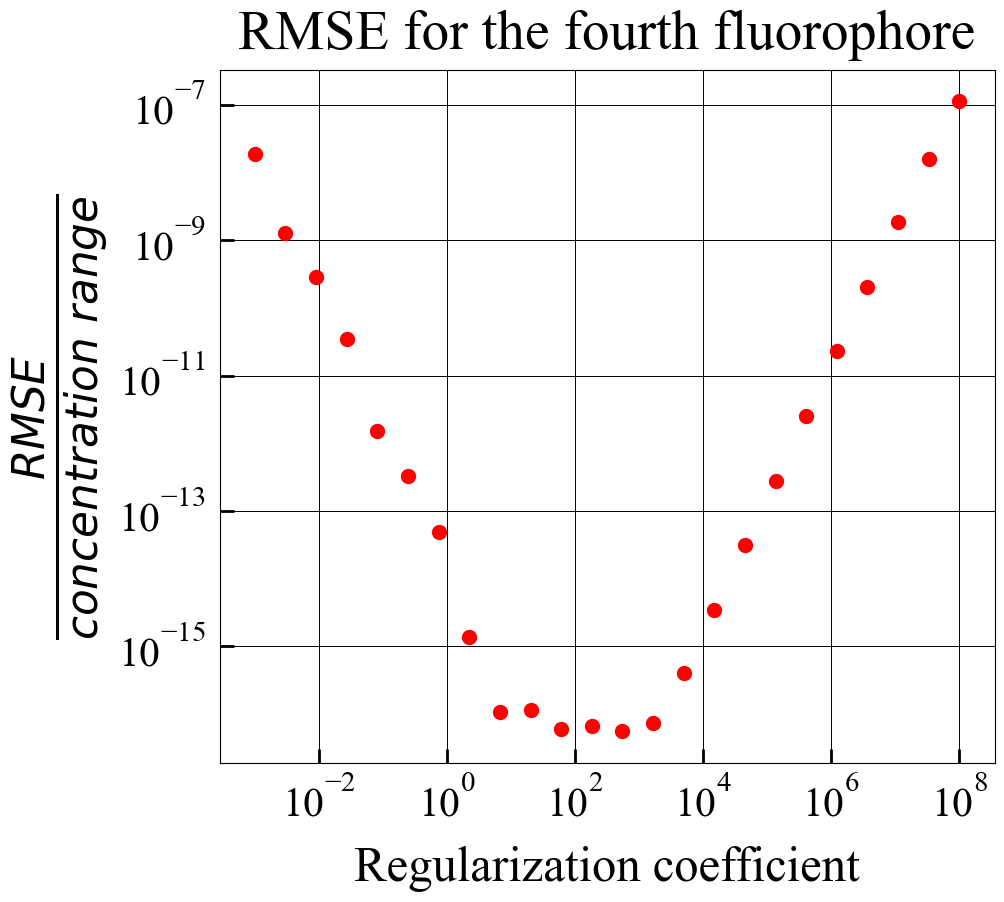

In [73]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(10, 9))
plt.xscale('log')
plt.yscale('log')
axs.plot(np.logspace(-3, 8,num = 24),(mse_cv**0.5)/9.892792939426727,
        ".",color="red",ms=20,label='RMSE')
axs.set_ylabel('$\\frac {RMSE}{concentration\ range}$',  fontsize=45,labelpad=5)
axs.grid(color="black", drawstyle="default", linewidth=0.7)
axs.set_xlabel("Regularization coefficient",  fontsize=35,labelpad=15)
# axs.set_title("fourth fluorophore", fontsize=40,loc="center" ,pad=15)
axs.set_title("RMSE for the fourth fluorophore", fontsize=40,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.tick_params(pad=10)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=30)
axs.set_xticklabels(axs.get_xticklabels(), fontsize=30)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')

plt.savefig('../Work/images/PNG/fig4/fourth_good_23.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.savefig("../Work/images/SVG/fig4/fourth_good_23.svg", format="svg",bbox_inches='tight')

plt.show()

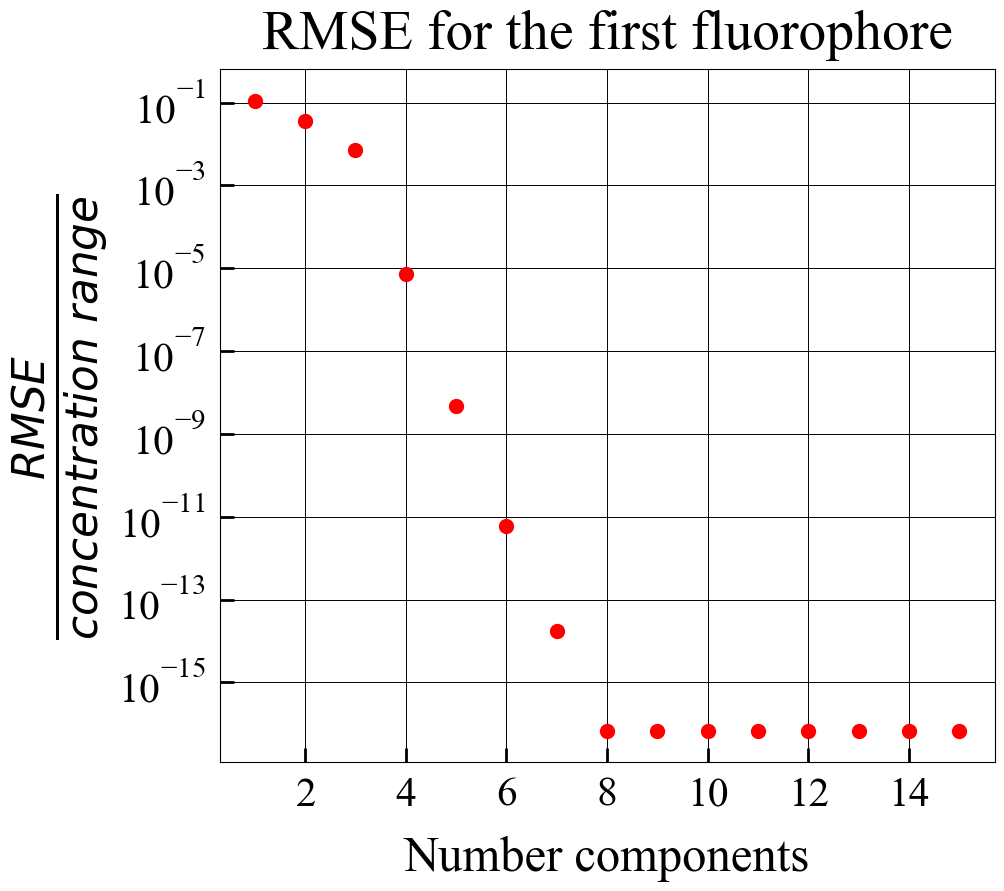

In [116]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(10, 9))
# plt.xscale('log')
plt.yscale('log')
axs.plot([i for i in range(1,16)],(mse_cv**0.5)/9.892792939426727,
        ".",color="red",ms=20,label='RMSE')
axs.set_ylabel('$\\frac {RMSE}{concentration\ range}$',  fontsize=45,labelpad=5)
axs.grid(color="black", drawstyle="default", linewidth=0.7)
axs.set_xlabel("Number components",  fontsize=35,labelpad=15)
# axs.set_title("first fluorophore", fontsize=40,loc="center" ,pad=15)
axs.set_title("RMSE for the first fluorophore", fontsize=40,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.tick_params(pad=10)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=30)
axs.set_xticklabels(axs.get_xticklabels(), fontsize=30)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')

plt.savefig('../Work/images/PNG/fig4/first_good_23_com_log.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.savefig("../Work/images/SVG/fig4/first_good_23_com_log.svg", format="svg",bbox_inches='tight')

plt.show()

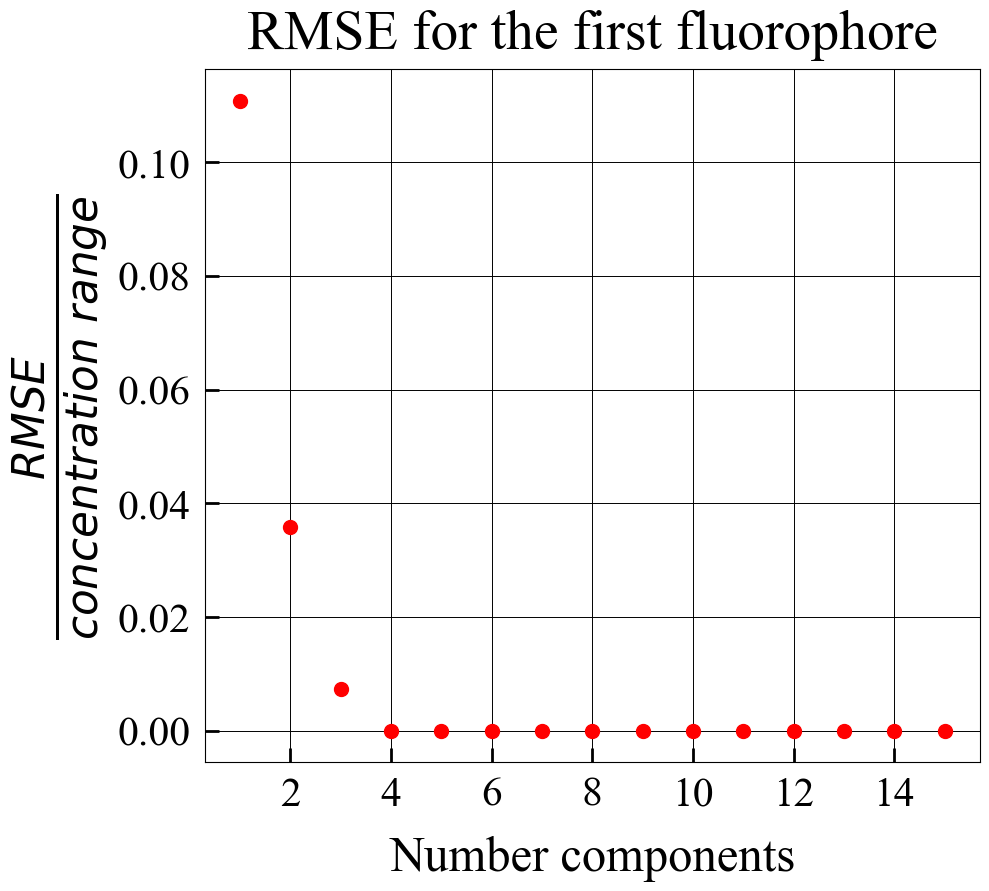

In [117]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(10, 9))
# plt.xscale('log')
# plt.yscale('log')
axs.plot([i for i in range(1,16)],(mse_cv**0.5)/9.892792939426727,
        ".",color="red",ms=20,label='RMSE')
axs.set_ylabel('$\\frac {RMSE}{concentration\ range}$',  fontsize=45,labelpad=5)
axs.grid(color="black", drawstyle="default", linewidth=0.7)
axs.set_xlabel("Number components",  fontsize=35,labelpad=15)
# axs.set_title("first fluorophore", fontsize=40,loc="center" ,pad=15)
axs.set_title("RMSE for the first fluorophore", fontsize=40,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.tick_params(pad=10)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=30)
axs.set_xticklabels(axs.get_xticklabels(), fontsize=30)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')

plt.savefig('../Work/images/PNG/fig4/first_good_23_com.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.savefig("../Work/images/SVG/fig4/first_good_23_com.svg", format="svg",bbox_inches='tight')

plt.show()

In [35]:
?axs.set_yticklabels

Signature: axs.set_yticklabels(labels, *, minor=False, fontdict=None, **kwargs)
Docstring:
[*Discouraged*] Set the yaxis' tick labels with list of string labels.

.. admonition:: Discouraged

    The use of this method is discouraged, because of the dependency on
    tick positions. In most cases, you'll want to use
    ``Axes.set_[x/y/z]ticks(positions, labels)`` or ``Axes.set_yticks``
    instead.

    If you are using this method, you should always fix the tick
    positions before, e.g. by using `.Axes.set_yticks` or by explicitly
    setting a `~.ticker.FixedLocator`. Otherwise, ticks are free to
    move and the labels may end up in unexpected positions.

Parameters
----------
labels : sequence of str or of `.Text`\s
    Texts for labeling each tick location in the sequence set by
    `.Axes.set_yticks`; the number of labels must match the number of
    locations.

minor : bool
    If True, set minor ticks instead of major ticks.

fontdict : dict, optional
    A dictionary contro

In [37]:
?Axes.set_yticks

Object `Axes.set_yticks` not found.


In [170]:
bad_interval=MetrPlot(y_name="$\\frac {RMSE}{concentration\ range}$",
                   x_name="Regularization coefficient",save_name="Bad_third_synth_RMSE")

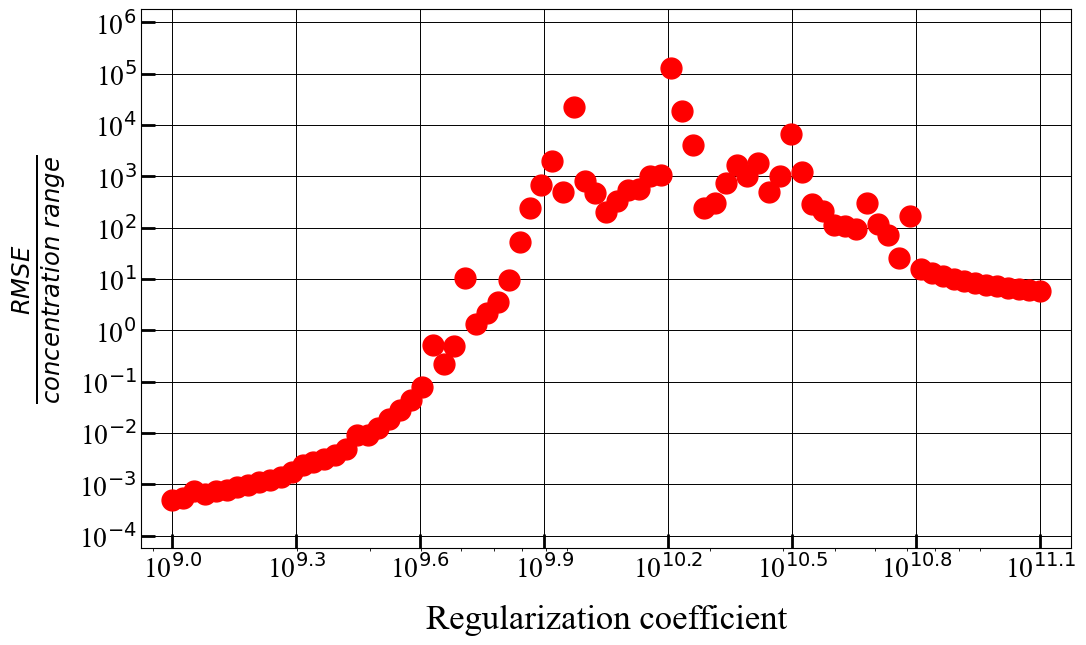

In [172]:
vv=bad_interval.main(x=np.logspace(9, 11.1,num = 81),
                  y=(mse_cv**0.5)/9.892792939426727,
                  save=False)

Predict-reference 

In [123]:
pr=PRPlot()

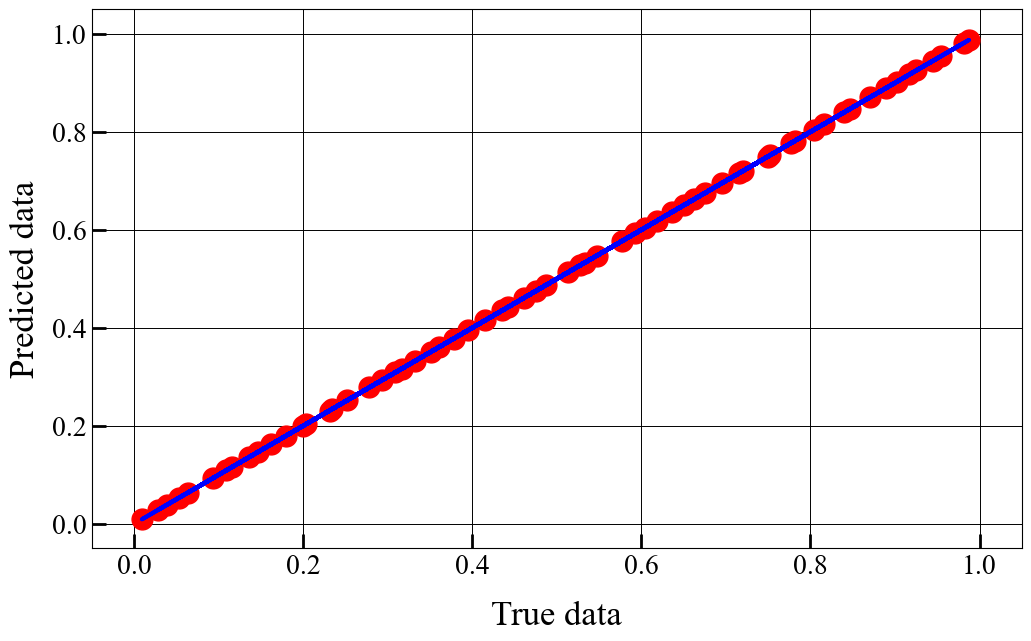

In [125]:
v=pr.main(ref=y,predict=predictors,save=True,y_name="Predicted data",
           x_name="True data",save_name="PR_Synthetic_fourth_2023")

In [126]:
rmse_plot=MetrPlot(sc_y="linear",y_name="$\\frac {RMSE}{concentration\ range}$",
                   x_name="Regularization coefficient",save_name="Fourth_synth_RMSE")

In [ ]:
0.9777167392785486
0.9869664883299265
0.9892792939426727
0.9781325910080341

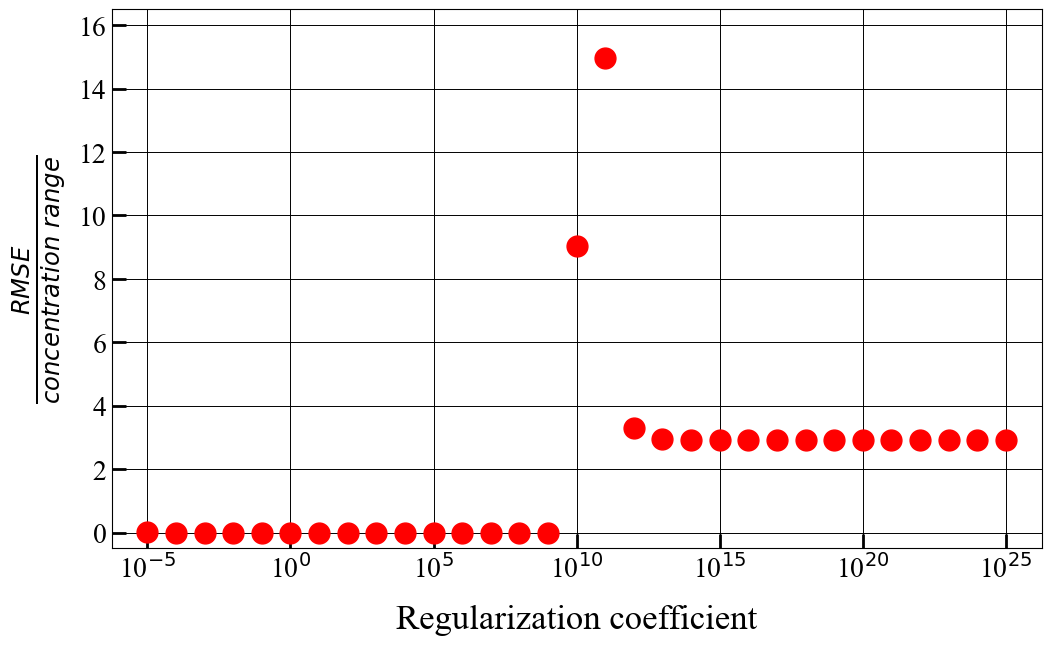

In [127]:
vv=rmse_plot.main(x=np.logspace(-25, 25,num = 51)[20:],
                  y=(mse_cv[20:]**0.5)/0.9781325910080341,
                  save=True)

In [128]:
mse_cv[19:],min(mse_cv[19:]),mse_cv[19:][8],np.logspace(-25, 25,num = 51)[19:][8]

(array([2.14656388e+06, 4.56922456e-05, 2.64855812e-07, 4.64206768e-09,
        6.16256726e-12, 1.02322647e-13, 5.50166689e-15, 8.62841524e-17,
        1.36102513e-19, 8.19179809e-18, 7.99777781e-16, 7.99258742e-14,
        7.97348360e-12, 7.77831846e-10, 5.48933873e-08, 2.00793218e-06,
        7.79155559e+01, 2.14467654e+02, 1.04491603e+01, 8.36771832e+00,
        8.18848870e+00, 8.17082378e+00, 8.16905985e+00, 8.16888348e+00,
        8.16886584e+00, 8.16886408e+00, 8.16886390e+00, 8.16886388e+00,
        8.16886388e+00, 8.16886388e+00, 8.16886388e+00, 8.16886388e+00]),
 1.3610251297551162e-19,
 1.3610251297551162e-19,
 100.0)

In [129]:
npls1=npls()
scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
parametrsNames={'n_components': range(1,21),
                'a': [100]}

In [130]:
%%time
gridCought=GridSearchCV(npls1, parametrsNames, cv=5, scoring=scoring,refit='r2', return_train_score=True)
gridCought.fit(X_train.copy(),y_train.copy())

#gridCought.fit(X, y)
r2_p=gridCought.score(X_test.copy(), y_test.copy())
mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
mse_c=gridCought.cv_results_[ "mean_train_mse" ]
r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
r2_c=gridCought.cv_results_[ "mean_train_r2" ]

CPU times: user 25.7 s, sys: 505 ms, total: 26.2 s
Wall time: 46.6 s


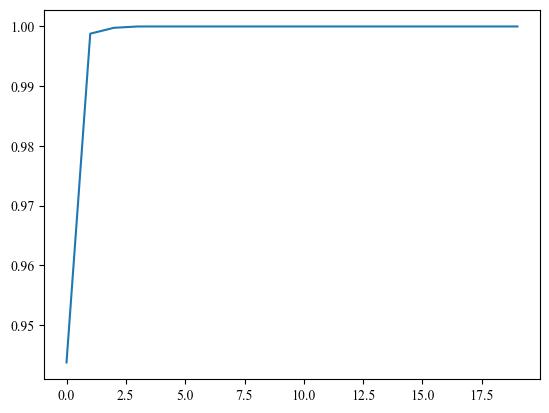

In [131]:
plt.plot(r2_cv)
plt.show()

In [132]:
rmse_second_plot=MetrPlot(sc_x="linear", sc_y="linear", y_name="$\\frac {RMSE}{concentration\ range}$",
                   x_name="Number of components",save_name="Fourth_synth_RMSE_com")

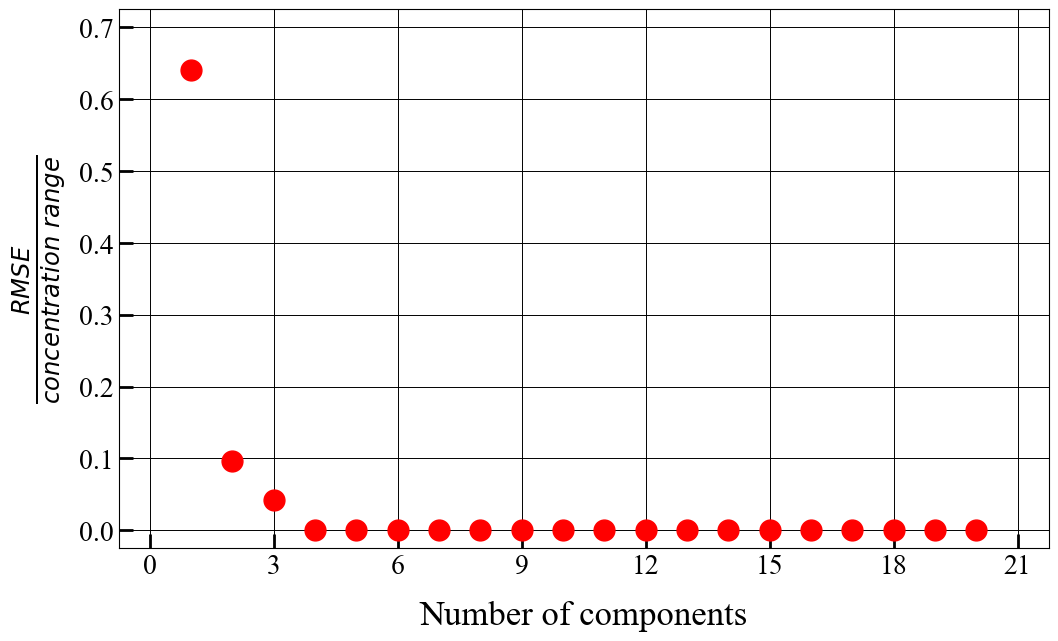

In [133]:
vv=rmse_second_plot.main(x=[i for i in range(1,21)], y=(mse_cv**0.5)/0.9892792939426727,
                         save=True)